# Langgrraph
> Complete Tutorial

# **Lab 1:**
This lab is about the basic understanding of the langgraph . What we will learn here is:-
>Basics of the Langgraph:- Before we call the `graph.invoke(state)`
1. Define the `state` class
2. Start the `graphbuilder`
3. Create a `node`.
4. Create `edges`.
5. Compile the graph

### Installing dependencies

In [ ]:
!pip -q install langgraph openai langchain-groq langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 17.0 MB/s eta 0:00:00


In [ ]:
from typing import Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
import os
import getpass

from IPython.display import Image, display
import gradio as gr

from pydantic import BaseModel
import random

## LLm and API Key

In [ ]:
if "GROQ_API_KEY" not in os.environ:
    os.environ["GROQ_API_KEY"] = getpass.getpass("Enter your Groq API key: ")


Enter your Groq API key: ··········


In [ ]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    groq_api_key= os.environ["GROQ_API_KEY"],
    model="llama-3.3-70b-versatile",  # Can be replace with our preferred model
    temperature=0.3
)

print(llm.invoke("one word").content)

Hello


This is how we can message using the open ai message
`message = [ "role" : "Define the role here(user or system)", "content": "Ask any thing  here"] `

In [ ]:
messages = [{"role": "user",
             "content": "What is the capital of India?"}]
print(llm.invoke(messages).content)

The capital of India is New Delhi.


## Lang Graph:
1. `State`: The Current state of the graph, after each node we will have new state . We defined a class State that will hold all the state message and it will not be over written.
2. `Node`: Node is basically a python function that will handle the state . Like Invoking the llm and storing the response to the state. So the basically node is handling the state of the graph.
3. `Edges`: Edges will connect the nodes , like a work flows . `START` -> `Node` -> `END` .


In [ ]:
# Step 1: Define the State object

class State(BaseModel):
    messages: Annotated[list, add_messages]

In [ ]:
# Step 2: Start the Graph Builder with this State class

graph_builder = StateGraph(State)

In [ ]:
# Step 3: Create a Node

def chatbot_node(old_state: State) -> State:
    response = llm.invoke(old_state.messages)
    new_state = State(messages=[response])
    return new_state

graph_builder.add_node("chatbot", chatbot_node)

In [ ]:
# Step 4: Create Edges

graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

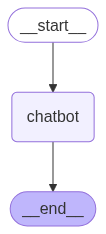

In [ ]:
# Step 5: Compile the Graph

graph = graph_builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
def chat(user_input: str):
    initial_state = State(messages=[{"role": "user", "content": user_input}])
    result = graph.invoke(initial_state)
    # print(result)
    return result['messages'][-1].content

In [ ]:
while True:
    user = input("User Input: ")
    if user.lower() == 'q':
        print("Exiting chat...")
        break
    try:
        response = chat(user)
        print("AI:", response)
    except Exception as e:
        print("An error occurred:", str(e))


User Input: hey
AI: Hello, how can I assist you today?
User Input: today is what?
AI: Today is June 16, 2025, but I'm an AI and do not have have access to real-time information, so it may not be the current date when you are reading this.
User Input: ok great
AI: It seems like we just started. Is there something I can help you with or would you like to start a conversation?
User Input: q
Exiting chat...


# **Lab 2:**
> Detail of this lab
1. Langsmith.
2. Tools :- out of the box.
3. Tools :- Custom
4. Checkpointing :- Memory

### **Super-Step:** A super-step can be considered as a single iteration over the graph. Nodes that can execute in parallel are grouped into the same super-step, while nodes that must run in sequence (due to dependencies) are scheduled in different super-steps.
- It is basically an iteration after a graph invoke till we get the outcome.
- Every user interaction is a fresh graph.invoke(state) call.
-


## Installing Dependencies

In [ ]:
!pip -q install langgraph openai langchain-groq langchain langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.1/438.1 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.6 MB/s eta 0:00:00


In [ ]:
!pip install -qU duckduckgo-search langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 33.8 MB/s eta 0:00:00


In [ ]:
from typing import Annotated
from typing import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
import os
import getpass

from IPython.display import Image, display
import gradio as gr

from pydantic import BaseModel
import random

## LLM, API Keys and Langsmith

In [ ]:
if "GROQ_API_KEY" not in os.environ:
    os.environ["GROQ_API_KEY"] = getpass.getpass("Enter your Groq API key: ")


In [ ]:
if "LANGSMITH_API_KEY" not in os.environ:
    os.environ["LANGSMITH_API_KEY"] = getpass.getpass("Enter your Langsmith API key: ")


Enter your Langsmith API key: ··········


In [ ]:
# below should not be changed
LANGSMITH_API_KEY=os.environ["LANGSMITH_API_KEY"]
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
# you can change this as preferred
os.environ["LANGCHAIN_PROJECT"] = "Langgraph Memory"

In [ ]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    groq_api_key= os.environ["GROQ_API_KEY"],
    model="llama-3.3-70b-versatile",  # Can be replace with our preferred model
    temperature=0.3
)

print(llm.invoke("say hare krishna").content)

Hare Krishna.


### We have a very useful function from the Langgraph community

In [ ]:
from langchain_community.tools import DuckDuckGoSearchRun

search = DuckDuckGoSearchRun()

search.invoke(" WHO full form")

"The United Nations agency working to promote health, keep the world safe and serve the vulnerable. World Health Organization (WHO), specialized agency of the United Nations (UN) established in 1948 to further international cooperation for improved public health conditions. Although it inherited specific tasks relating to epidemic control, quarantine measures, and drug standardization from the Health Organization of the League of Nations (set up in 1923) and the International Office of ... It was established on 7 April 1948, which is celebrated as World Health Day. WHO built the assets, staff, and duties of the League of Nations' Health Organization and the Office International d'Hygiène Publique, including the International Classification of Diseases (ICD). WHO Full form is World Health Organization. When the plague, cholera and yellow fever rippled deadly waves across a newly industrialised and interconnected world in the mid-19th century, taking a global approach to health became an

####  LangChain wrapper class for converting functions into Tools

In [ ]:
from langchain.agents import Tool

tool_search =Tool(
        name="search",
        func=search.run,
        description="Useful for when you need more information from an online search"
    )

In [ ]:
tool_search.invoke("Narendra Modi")

'Narendra Modi Narendra Modi (born September 17, 1950, Vadnagar, India) is an Indian politician and government official who rose to become a senior leader of the Bharatiya Janata Party (BJP). In 2014 he led his party to victory in elections to the Lok Sabha (lower chamber of the Indian parliament), after which he was sworn in as prime minister of India. -PM Narendra Modi to citizens of his adopted village Jayapur. Beti Bachao Beti Padhao (BBBP) was launched by the Prime Minister on 22nd January, 2015 at Panipat, Haryana. BBBP addresses the declining Child Sex Ratio (CSR) and related issues of women empowerment over a life-cycle continuum. It is a tri-ministerial effort of Ministries of Women ... Prime Minister Narendra Modi arrived in Cyprus on Sunday for a two-day official visit, the first by an Indian prime minister in over 20 years. During his stay, Modi will meet with President Nikos ... Prime Minister Narendra Modi inaugurated the Chenab River, and the Anji River and also launched

#### Combining al the tools

In [ ]:
tools = [tool_search]

#### Setting our Langgraph

In [ ]:
# Step 1: Define the State object
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [ ]:
# Step 2: Start the Graph Builder with this State class
graph_builder = StateGraph(State)

In [ ]:
llm_with_tools = llm.bind_tools(tools)

In [ ]:
# Step 3: Create a Node
from langgraph.prebuilt import ToolNode, tools_condition

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", ToolNode(tools=tools))

In [ ]:
# Step 4: Create Edges


graph_builder.add_conditional_edges( "chatbot", tools_condition, "tools")

# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

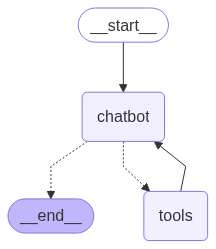

In [ ]:
# Step 5: Compile the Graph
graph = graph_builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
def chat(user_input: str, history):
    result = graph.invoke({"messages": [{"role": "user", "content": user_input}]})
    return result["messages"][-1].content


## Langgraph with memory

## Memory Check Point
> How we will deine it ?
- we will just insert `checkpointer=memory` while compiling the graph.
- Define `config = {"configurable": {"thread_id": "1"}}` and pass this in the chat

In [ ]:
from langgraph.checkpoint.memory import MemorySaver
# Defining Our Memory
memory = MemorySaver()


In [ ]:
from langchain.agents import Tool
from langchain_community.tools import DuckDuckGoSearchRun

# Deining Our Tools
search = DuckDuckGoSearchRun()

tool_search =Tool(
        name="search",
        func=search.run,
        description="Useful for when you need more information from an online search"
    )

In [ ]:
# Step 1: Define the State object
class State(TypedDict):
    messages: Annotated[list, add_messages]

# Step 2: Start the Graph Builder with this State class
graph_builder = StateGraph(State)

# Bind LLm With Tools
llm_with_tools = llm.bind_tools(tools)


# Step 3: Create a Node
from langgraph.prebuilt import ToolNode, tools_condition

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", ToolNode(tools=tools))


# Step 4: Create Edges

graph_builder.add_conditional_edges( "chatbot", tools_condition, "tools")

# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

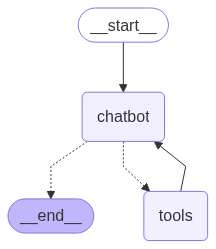

In [ ]:
# Step 5: Compile the Graph

graph = graph_builder.compile(checkpointer=memory)

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
config = {"configurable": {"thread_id": "1"}}

def chat(user_input: str, history):
    result = graph.invoke({"messages": [{"role": "user", "content": user_input}]}, config=config) # Very Little Difference {adiing config to track back in time}
    return result["messages"][-1].content


gr.ChatInterface(chat, type="messages").launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://70ebb5478f4f58c91e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


### SQL :-
Persistent Memory with database. All the chats will be stored in the database.

In [ ]:
!pip install -qU langgraph-checkpoint-sqlite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.6/151.6 kB 5.8 MB/s eta 0:00:00


In [ ]:
import sqlite3
from langgraph.checkpoint.sqlite import SqliteSaver

db_path = "memory.db"  # This will store the database of the chats
conn = sqlite3.connect(db_path, check_same_thread=False)
# SQL Memory
sql_memory = SqliteSaver(conn)

In [ ]:
# Steps 1 and 2
graph_builder = StateGraph(State)

In [ ]:
from langchain.agents import Tool
from langchain_community.tools import DuckDuckGoSearchRun

# Deining Our Tools
search = DuckDuckGoSearchRun()

tool_search =Tool(
        name="search",
        func=search.run,
        description="Useful for when you need more information from an online search"
    )

In [ ]:
# Step 1: Define the State object
class State(TypedDict):
    messages: Annotated[list, add_messages]

# Step 2: Start the Graph Builder with this State class
graph_builder = StateGraph(State)

# Bind LLm With Tools
llm_with_tools = llm.bind_tools(tools)


# Step 3: Create a Node
from langgraph.prebuilt import ToolNode, tools_condition

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", ToolNode(tools=tools))


# Step 4: Create Edges

graph_builder.add_conditional_edges( "chatbot", tools_condition, "tools")

# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

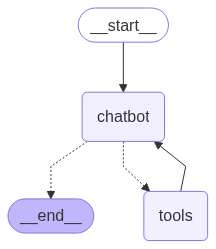

In [ ]:
# Step 5: Compile the Graph

graph = graph_builder.compile(checkpointer=sql_memory)

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
config = {"configurable": {"thread_id": "3"}}

def chat(user_input: str, history):
    result = graph.invoke({"messages": [{"role": "user", "content": user_input}]}, config=config)
    return result["messages"][-1].content


gr.ChatInterface(chat, type="messages").launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cadd7440734283971a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
